<a href="https://colab.research.google.com/github/akinbeduk/Clarusway/blob/main/DL_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [89]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [90]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [91]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [92]:
X_train[12].shape

(28, 28)

In [93]:
X_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [94]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

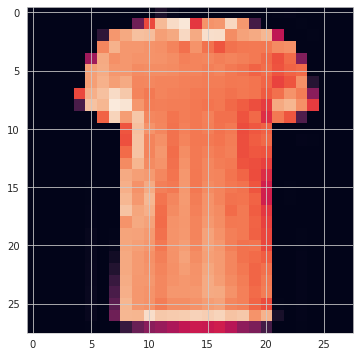

In [95]:
plt.imshow(X_train[17])

In [96]:
y_train[17]

0

In [97]:
y_train.shape

(60000,)

In [98]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [99]:
np.unique(y_train, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [100]:
y_train[17]

0

In [101]:
classes[int(y_train[17])]

'T-shirt/top'

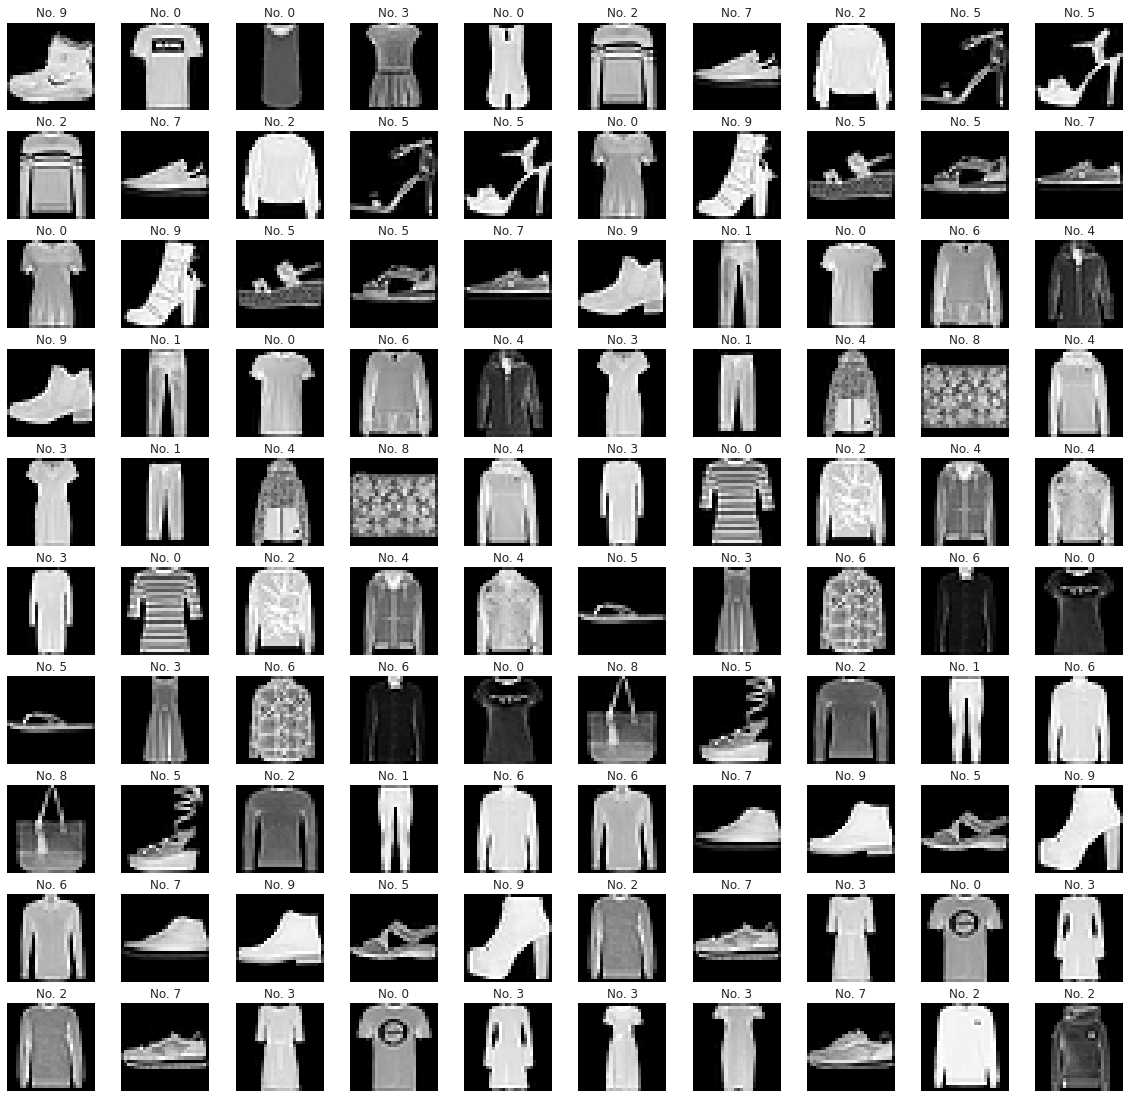

In [102]:
num_rows, num_cols = 10, 10
f, ax = plt.subplots(10, 10, figsize=(20,20),
                     gridspec_kw={'wspace':0.3, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [103]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [104]:
X_train[12].min()

0

In [105]:
X_train[12].max()

255

In [106]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [107]:
X_train[12].min()

0.0

In [108]:
X_train[12].max()

1.0

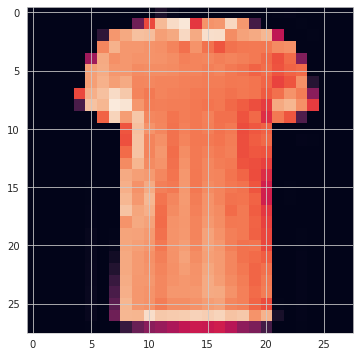

In [109]:
plt.imshow(X_train[17])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [110]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [111]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [112]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [113]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [114]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [115]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [116]:
from tensorflow.keras.utils import to_categorical

In [117]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [118]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [119]:
Y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization

In [121]:
model = Sequential()

model.add(Conv2D(28, (3,3), padding='same', activation='relu', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_20 (Bat  (None, 28, 28, 28)       112       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 28)       112       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [80]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.9911 - accuracy: 0.6523 - val_loss: 0.4802 - val_accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5231 - accuracy: 0.8227 - val_loss: 0.3474 - val_accuracy: 0.8797
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4413 - accuracy: 0.8546 - val_loss: 0.3838 - val_accuracy: 0.8552
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3948 - accuracy: 0.8705 - val_loss: 0.2854 - val_accuracy: 0.8974
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3704 - accuracy: 0.8779 - val_loss: 0.2660 - val_accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3444 - accuracy: 0.8872 - val_loss: 0.2629 - val_accuracy: 0.9086
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3237 - accuracy: 0.8941 - val_loss: 0.2483 - val_ac

In [81]:
model.metrics_names

['loss', 'accuracy']

In [82]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.991,0.652,0.480,0.822
1,0.523,0.823,0.347,0.880
2,0.441,0.855,0.384,0.855
3,0.395,0.871,0.285,0.897
4,0.370,0.878,0.266,0.905


**TASK 7: Plot values of metrics you used in your model.**

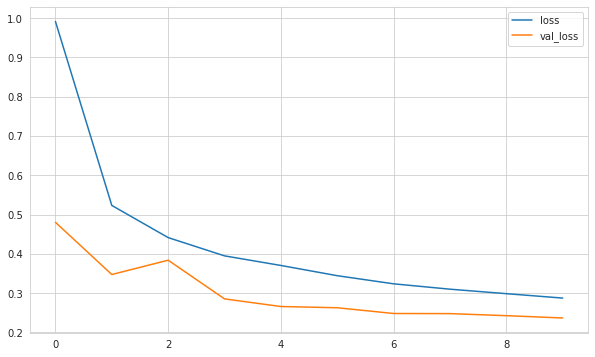

In [83]:
summary[["loss", "val_loss"]].plot();

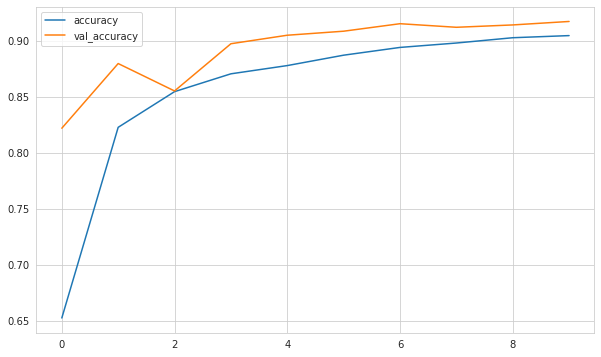

In [84]:
summary[["accuracy", "val_accuracy"]].plot();

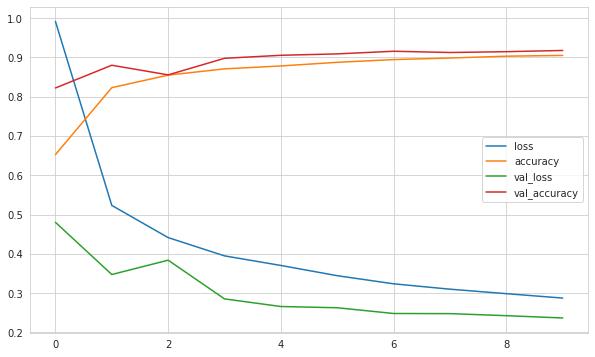

In [85]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [86]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [87]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.9173


[0.23686887323856354, 0.9172999858856201]

In [125]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.302269458770752
Test accuracy: 0.10000000149011612


In [126]:
pred_prob = model.predict(X_test)
pred_prob

array([[0.09981717, 0.09970111, 0.09998479, ..., 0.10007942, 0.10007193,
        0.09989859],
       [0.09968324, 0.09945566, 0.09993435, ..., 0.10008811, 0.10000189,
        0.09964232],
       [0.0996953 , 0.09960946, 0.10001463, ..., 0.10001557, 0.10024261,
        0.09975205],
       ...,
       [0.09977154, 0.09964424, 0.09991336, ..., 0.1001412 , 0.10025872,
        0.10000547],
       [0.09977263, 0.09968906, 0.09994779, ..., 0.09993158, 0.10019258,
        0.09986303],
       [0.09989246, 0.09971703, 0.09995764, ..., 0.10013406, 0.10012735,
        0.09988679]], dtype=float32)

In [127]:
pred_prob.shape

(10000, 10)

In [128]:
pred_prob[0]

array([0.09981717, 0.09970111, 0.09998479, 0.09980883, 0.10005827,
       0.10056417, 0.10001571, 0.10007942, 0.10007193, 0.09989859],
      dtype=float32)

In [129]:
np.argmax(pred_prob[0])

5

In [130]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([5, 5, 5, ..., 5, 5, 5])

In [131]:
y_pred.shape

(10000,)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



In [133]:
print(confusion_matrix(y_test, y_pred))

[[   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]]


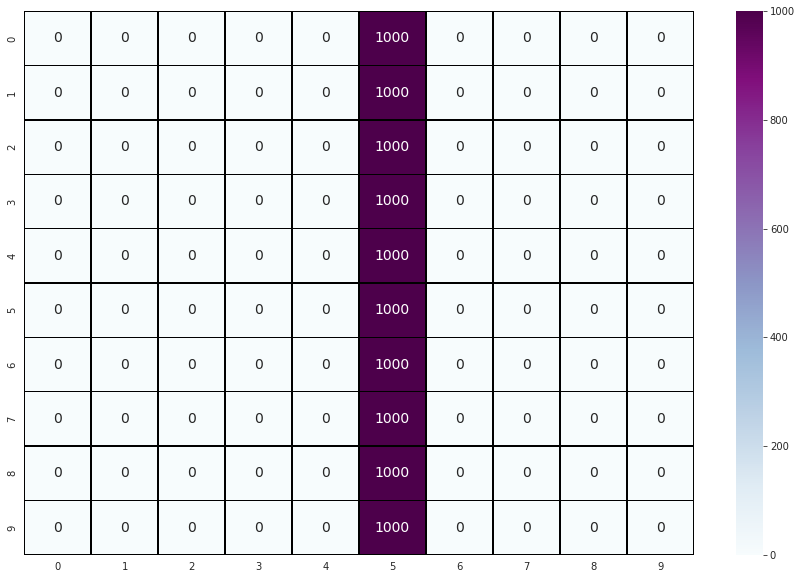

In [134]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="BuPu", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [135]:
my_image = X_test[25]

In [136]:
my_image.shape

(28, 28, 1)

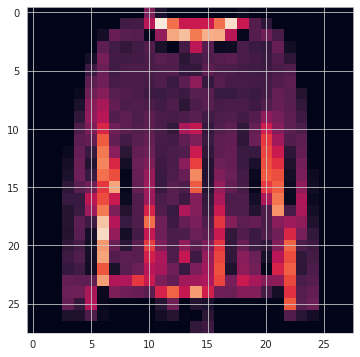

In [137]:
plt.imshow(my_image.reshape(28,28));

In [138]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [139]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

array([[0.09980425, 0.09971441, 0.09993203, 0.09974951, 0.1000791 ,
        0.10059649, 0.10001345, 0.10009173, 0.10017604, 0.09984292]],
      dtype=float32)

In [140]:
y_pred = np.argmax(pred_prob)
y_pred

5

In [141]:
np.argmax(image_prediction, axis=1)

array([5])

In [142]:
result = np.argmax(image_prediction, axis=1)
result

array([5])

In [143]:
classes[int(result)]

'Sandal'

In [144]:
model.save("cnn-1.h5")

In [145]:
model=tf.keras.models.load_model('cnn-1.h5')

In [146]:
pred=model.predict(np.expand_dims(X_test[14],axis=0))

In [147]:
np.argmax(pred)

5

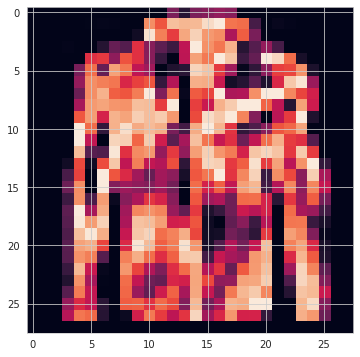

In [149]:
plt.imshow(X_test[17].reshape(28,28))

In [150]:
classes[int(result)]

'Sandal'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___